<h1 class="heading"> TUTORIAL 01</h1>
<h1>CSS styles, basic Python operations and aircraft trim</h1>

<h6 class="author"> — <b style="color:rgb(0,51,102);">Carmine Varriale, Agostino De Marco</b>, <i>University of Naples Federico II</i></h6>


## 1.0 Initialization

In [1]:
# Module import, style and preliminary definition of custom auxiliary functions,
# mainly for post-processing and data handling

% run ./python/nb_init.py                        
% matplotlib inline                              

import plotting_routines as plrt                 # Collection of functions to fast plot data
from data_handling import *                      # Collection of functions

<h2>1.1 Introduction</h2>
<div class="main">
We are using this set of Jupyter Notebooks to illustate some of the features and possibilities of the Python language and JSBSim flight dynamics simulator. <br/>
As it is possible to see while editing this notebook, Jupyter supports HTML and CSS languages: they were used to give documents a professional, consistent, but at the same pleasant style. The CSS style sheet used can be found at <div class="path">./style/style_unina_iwes.css</div> 
with respect to the position of this notebook. In order to assign a style sheet to a specific Jupyter Notebook, we are running  the following Python code, which makes use of the <div class="typewr">HTML</div> module of the <div class="typewr">IPython.core.display</div> library.
</div>

In [2]:
#set the notebook style with CSS
from IPython.core.display import HTML
HTML(open('./style/style_unina_iwes.css', 'r').read())

<div class="main">
To show line numbers in code cells, select the cell, click <div class="button">ESC</div> and then <div class="button">L</div>. This might be helpful to reference sections of code in paragraph.<br/><br/>

Although Jupyter Notebooks also support the Markdown syntax, HTML and CSS are more powerful tools and provide better realistic results: our choice fell on the latter, for this notebooks might also have an instructional purpose in the future.
</div>

<h2> 1.2 JSBSim basics </h2>
<div class="main">
Let's assume we already have a complete aircraft model file. For our examples, we are currently going to use the Cessna 172x aircraft, whose JSBSim model is stored in the following relative directory, with respect to the position of the actual notebook file:
<div class="path">../JSBSim/aircraft/c172x/c172x.xml</div>
</div>

<h3>1.2.1 The initialization file</h3>
<div class="main">
In order to run a script, we must first identify and declare some arbitrary initial conditions for the simulation. This is done by creating a <div class="typewr"> init_*.xml </div> file in the aircraft folder; for this notebook, we are going to use:
    <div class="path">../JSBSim/aircraft/c172x/init_tutorial01.xml </div>
To see what the initialization file looks like in this same notebook we can exploit two Python features, but anyway, <b> it is obviously better to open the file in Notepad++ </b>, for syntax highlighting and readyness to edit it:

<ul><li> A first way makes use of a function defined in <div class="typewr">nb_init.py</div>, which reads the file one line at a time and supports line numbering;</li></ul>
</div>

In [3]:
show_file('../JSBSim/aircraft/c172x/init_tutorial01.xml')   

   1| <?xml version="1.0"?>                                       
   2| 
   3| <!-- 
   4| This file sets up the aircraft 
   5| at 4000 feet above Sea Level,
   6| over Naples, 
   7| on a heading of 200 degrees
   8| with engine running 
   9| -->
  10| 
  11| <initialize name="Inizialization for Tutorial 01">
  12|   
  13|   
  14|   <vt unit="KTS">         96.0  </vt>
  15|   <latitude unit="DEG">   40.0  </latitude>
  16|   <longitude unit="DEG">  14.2  </longitude>
  17|   <psi unit="DEG">       200.0  </psi>
  18|   <altitude unit="FT">  4000.0  </altitude>
  19|   <gamma unit="DEG">       0.0  </gamma>
  20|   
  21|   <!-- 
  22|   set number of engines running
  23|     -1 = all engines running
  24|      0 = no engines running 
  25|      1 = one engine running
  26|      ...
  27|      
  28|      NB Engine counters start from 0! 
  29|      0 is the index of the first engine
  30|    -->
  31|    
  32|   <running>                0   </running>                           

<div class="main">
<ul><li>Second way, which uses Python built-in functions to read file all at once (notice the method call <div class="typewr">.read()</div> for an object of type <i>file</i>); </li></ul></div>

In [4]:
print(open('../JSBSim/aircraft/c172x/init_tutorial01.xml').read())

<?xml version="1.0"?>                                       

<!-- 
This file sets up the aircraft 
at 4000 feet above Sea Level,
over Naples, 
on a heading of 200 degrees
with engine running 
-->

<initialize name="Inizialization for Tutorial 01">
  
  
  <vt unit="KTS">         96.0  </vt>
  <latitude unit="DEG">   40.0  </latitude>
  <longitude unit="DEG">  14.2  </longitude>
  <psi unit="DEG">       200.0  </psi>
  <altitude unit="FT">  4000.0  </altitude>
  <gamma unit="DEG">       0.0  </gamma>
  
  <!-- 
  set number of engines running
    -1 = all engines running
     0 = no engines running 
     1 = one engine running
     ...
     
     NB Engine counters start from 0! 
     0 is the index of the first engine
   -->
   
  <running>                0   </running>                                 
 
</initialize>


<div class="main">The code in JSBSim is often self-explainatory, like in this case.</div>

<h3> 1.2.2 Aircraft catalog</h3> 
<div class="main">
Now that some initial conditions have been set up manually, it is a very common necessity for the aircraft to be trimmed at said initial conditions. To do so, we must prepare a script file by creating a <div class="typewr">script_file.xml</div> file in the folder:
    <div class="path">../JSBSim/scripts/script_file.xml</div>
Before coding a script, though, it is often extremely useful to take a look at the set of JSBSim properties that are necessary to fully describe the dynamic model of the aircraft. This is done by asking JSBSim for the <div class="typewr">catalog</div> of the chosen aircraft. <br><br>

Let's first make a blank call to JSBSim, in its appropriate folder, to brush up some of its commands. The exclamative mark at the beginning of a line redirects the command line to the default system shell. In the following code cell, are reported the two different syntaxes that must be adopted for either Windows or Linux systems. From now on, we will adopt the Linux one.
</div>

In [5]:
# In Windows
#! ..\JSBSim\JSBSim.exe --help

# In Linux
! ../JSBSim/JSBSim --help


  JSBSim version 1.0 Nov  1 2016 15:10:56

  Usage: jsbsim [script file name] [output file names] <options>

  options:
    --help  returns this message
    --version  returns the version number
    --outputlogfile=<filename>  sets (overrides) the name of a data output file
    --logdirectivefile=<filename>  specifies the name of a data logging directives file
                                   (can appear multiple times)
    --root=<path>  specifies the JSBSim root directory (where aircraft/, engine/, etc. reside)
    --aircraft=<filename>  specifies the name of the aircraft to be modeled
    --script=<filename>  specifies a script to run
    --realtime  specifies to run in actual real world time
    --nice  specifies to run at lower CPU usage
    --nohighlight  specifies that console output should be pure text only (no color)
    --suspend  specifies to suspend the simulation after initialization
    --initfile=<filename>  specifies an initilization file
    --catalog specifies that

<div class="main">
    Notice that, in the command line, backslashes \ must be used fOR Windows instead of normal slashes /: this might be a source of error in the future.<br>
    In the next cell, we are finally producing the catalog for our aircraft. Notice that we will need to specify the JSBSim root folder. Since the file is very long, the output cell has been compressed by clicking on the transparent rectangle, on the left of the output panel:
    <ul><li>One click makes the output area scrollable</li>
        <li>Two clicks compress it completely, making it invisible</li>
    </ul>        
</div>


In [6]:
! ../JSBSim/JSBSim --root=../JSBSim --catalog=c172x



     JSBSim Flight Dynamics Model v1.0 Nov  1 2016 15:10:56
            [JSBSim-ML v2.0]

JSBSim startup beginning ...

FGPropertyManager::GetNode() No node found for attitude/Phi

  No property by the name attitude/Phi has been defined. This property will 
  not be logged. You should check your configuration file.
FGPropertyManager::GetNode() No node found for attitude/Theta

  No property by the name attitude/Theta has been defined. This property will 
  not be logged. You should check your configuration file.
FGPropertyManager::GetNode() No node found for attitude/Psi

  No property by the name attitude/Psi has been defined. This property will 
  not be logged. You should check your configuration file.

  Property Catalog for c172x

    inertial/sea-level-radius_ft (R)
    velocities/h-dot-fps (R)
    velocities/v-north-fps (R)
    velocities/v-east-fps (R)
    velocities/v-down-fps (R)
    velocities/u-fps (R)
    velocities/v-fps (R)
    velocities/w-fps (R)
    velocities/p-rad

<div class="main">
    To print the catalog to a file, we can redirect the shell standard output stream in the following way:
</div>

In [7]:
! ../JSBSim/JSBSim --root=../JSBSim/ --catalog=c172x > ../JSBSim/catalog_c172x.txt

FGPropertyManager::GetNode() No node found for attitude/Phi

  No property by the name attitude/Phi has been defined. This property will 
  not be logged. You should check your configuration file.
FGPropertyManager::GetNode() No node found for attitude/Theta

  No property by the name attitude/Theta has been defined. This property will 
  not be logged. You should check your configuration file.
FGPropertyManager::GetNode() No node found for attitude/Psi

  No property by the name attitude/Psi has been defined. This property will 
  not be logged. You should check your configuration file.


<div class="main">
    We are now ready to access all aircraft properties, and even create some more if we need them.
</div>

<h3>1.2.3 Script of the trimming procedure</h3>
<div class="main">
    For this example, we have created the file <div class="path"> ../JSBSim/scripts/c172x_tutorial01.xml </div> in which we trim the aircraft, for the initial conditions assigned previously. Let's see how the file is done:
</div>

In [8]:
show_file('../JSBSim/scripts/c172x_tutorial01.xml')

   1| <?xml version="1.0"?>
   2| <?xml-stylesheet type="text/xsl" 
   3|     href="http://jsbsim.sourceforge.net/JSBSimScript.xsl"?>
   4| 
   5| 
   6| <runscript xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
   7|     xsi:noNamespaceSchemaLocation="http://jsbsim.sf.net/JSBSimScript.xsd"
   8|     name="Script for C172x Tutorial 01 ">
   9|   
  10|   
  11|   <!--
  12|     This run is for trimming the aircraft while in cruise
  13|   -->
  14| 
  15|   <use aircraft="c172x" initialize="init_tutorial01" />
  16|   <run start="0.0" end="60" dt="0.0083333">                     
  17|   <!-- dt = 0.008333 is freq = 120 Hz -->
  18| 
  19| <!--
  20|       For "do_simple_trim" (Classic trim):
  21|       0: Longitudinal
  22|       1: Full
  23|       2: Ground
  24|       3: Pullup
  25|       4: Custom
  26|       5: Turn
  27|       6: None
  28| -->
  29| 
  30| <!-- Create event for trimming -->
  31|     <event name="Trim">
  32|       <description>Trim at the initial cond

<div class="main">Now we are ready to run our simulation. This time we will not do it using the ! character to escape to shell, but rather using a Python module to redirect a compound command string to shell, allowing us to use some Python variables in it. Keeping in mind that this notebook is in a different folder from the JSBSim executable, we shall specify the JSBSim root path in the launching command, as we did earlier for printing the <div class="typewr">catalog</div>:
</div>

In [9]:
script_path='../JSBSim/scripts/c172x_tutorial01.xml'

os.system('../JSBSim/JSBSim --root=../JSBSim/ '+   # call JSBSim
          '--script='+script_path +                    # reference script
          r' > ../JSBSim/log_tutorial01.txt')           #produce log file in JSBSim

# Output == 0 means everything went as expected

0

<div class="main">
If everything went as expected, we should now move output files to a suitable location, in order not to mess up with directories and folder organization. Let's do it with the following custom function
</div>

In [10]:
dest_folder='../output/tutorial01/'

move_files_to_folder('*.csv',dest_folder,'../JSBSim/')
move_files_to_folder('*.txt',dest_folder,'../JSBSim/')

<h3>1.2.4 Plotting results</h3>
<div class="main">
    The last thing to do is visualizing data output and store an image of the charts. This is done thanks to the following routine which revolves around the <div class="typewr">matplotlib</div> module and several custom plotting functions defined in the module <div class="path">./python/plotting_routines.py</div>

In [11]:
# create arrays of data from .csv files
data_fcs = np.genfromtxt(dest_folder+'c172_fcs.csv',       delimiter=',', skip_header=1)
data_vel = np.genfromtxt(dest_folder+'c172_velocities.csv',delimiter=',', skip_header=1)
data_att = np.genfromtxt(dest_folder+'c172_attitude.csv',  delimiter=',', skip_header=1)

# plot data (also try double-clicking on the charts)
plrt.plot_Cmd_AngVel_EulerAng(data_fcs, data_vel, data_att, dest_folder)

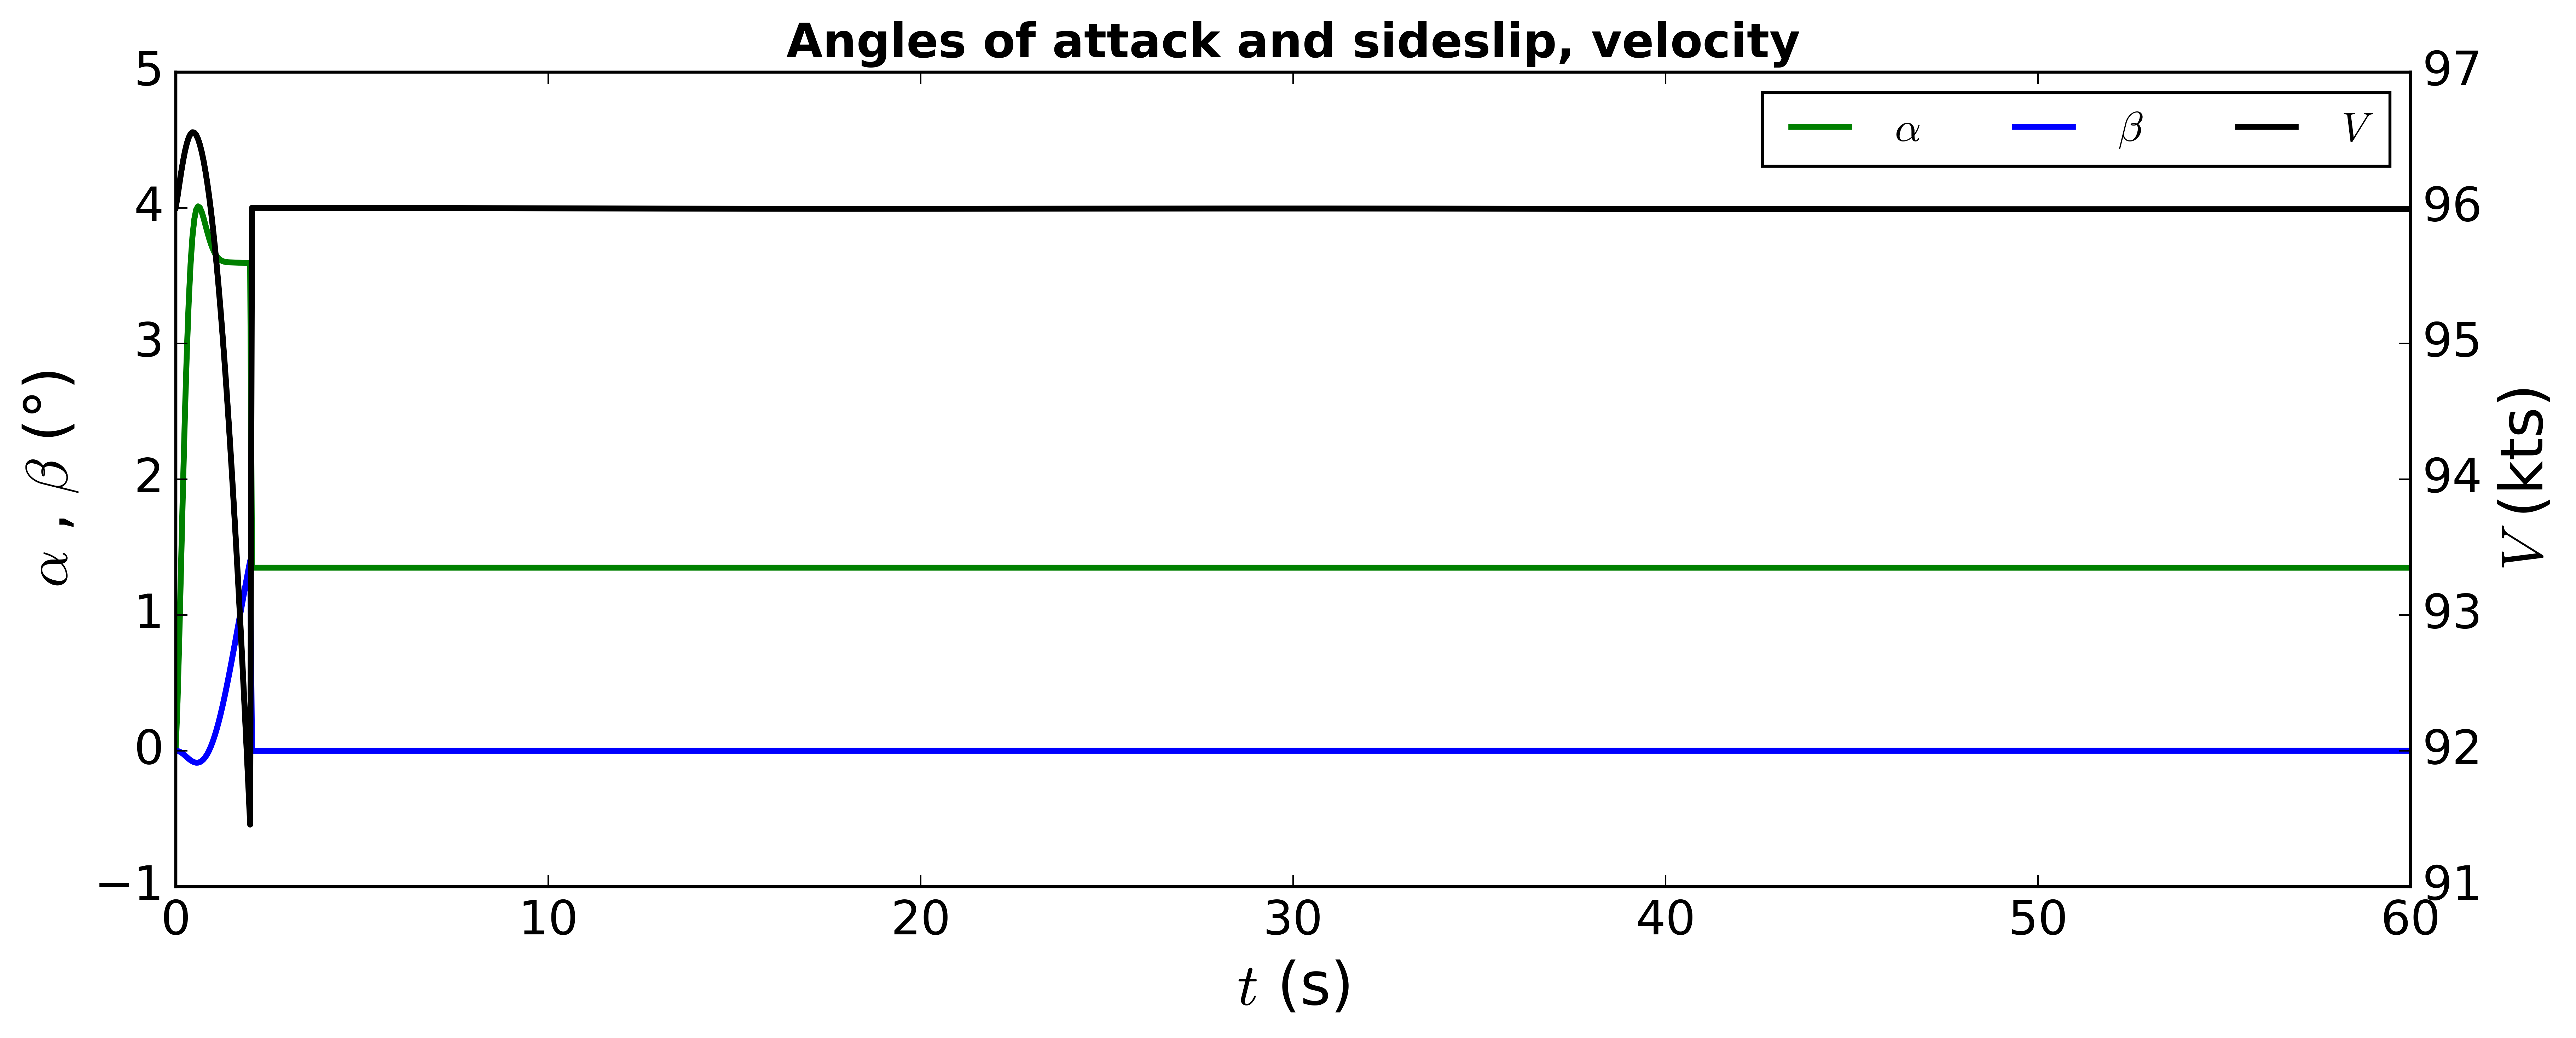

In [12]:
data_aero = np.genfromtxt(dest_folder+'c172_aero.csv', delimiter=',', skip_header=1)

plrt.plot_Alfa_Beta_V(data_aero, data_vel, dest_folder)

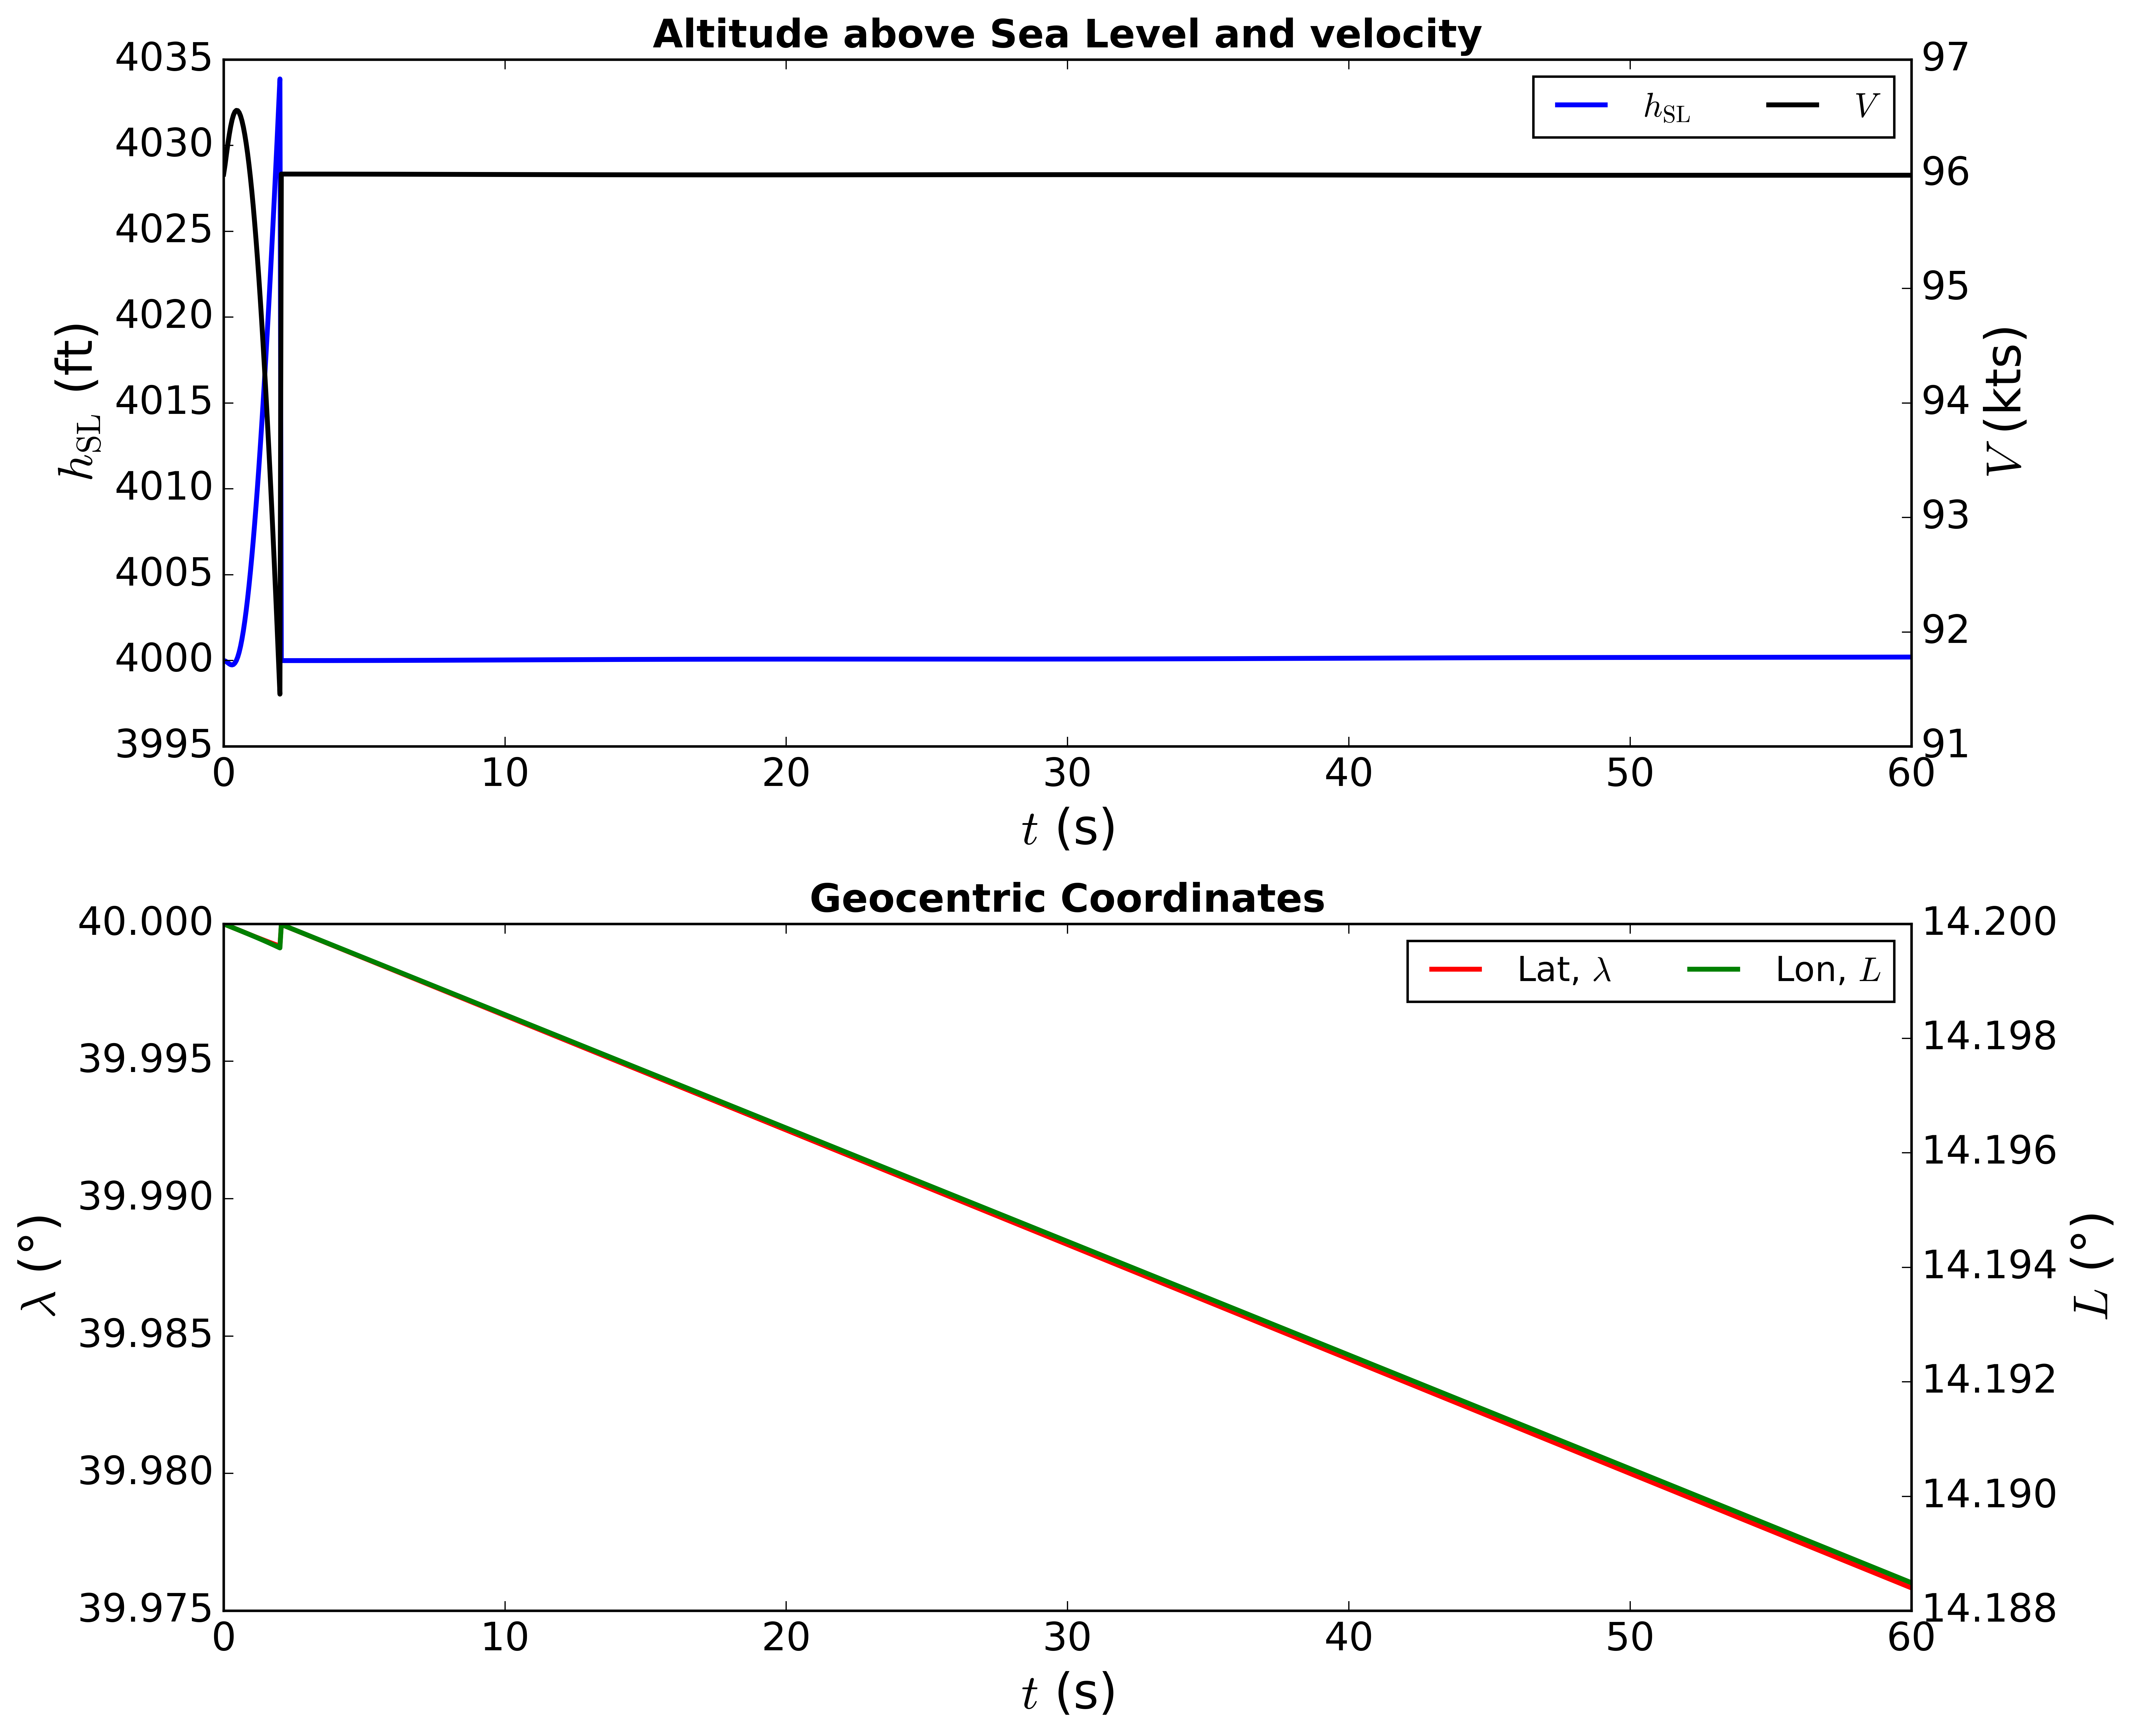

In [13]:
data_pos = np.genfromtxt(dest_folder+'c172_position.csv', delimiter=',', skip_header=1)

plrt.plot_PosGeoc(data_pos, data_vel, dest_folder)

In [14]:
data_engine = np.genfromtxt(dest_folder+'c172_propulsion.csv',delimiter=',', skip_header=1)
data_engine[0,9] = data_engine[1,9] # local correction for correct chart scaling

plrt.plot_EngineStatus(data_engine, data_vel, dest_folder)